## Importing required modules 

In [219]:
# Created by Shashadhar on 30 Nov 2021
# Comparison of diferent FFN with different activation function and optimizer

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation
import pandas as pd
import numpy as np
import nltk
from tensorflow import keras
from tensorflow.keras import utils as np_utils
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashadhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the data

In [220]:
data=pd.read_csv("bbc.csv")
data
activation_opt_list,accuracy_list=list(),list()

## Checking the target class

In [221]:
num_classes = len(data['Class'].unique())
num_classes

5

In [222]:
#Dropping the irrelevant first column
data = data.iloc[: , 1:]

#Shuffling the whole data to get the mixed categorical articles in each data set
data = data.sample(frac = 1)
data

,Article,Class
643,Rock group Korn's guitarist quits\n\nThe guita...,entertainment
629,'My memories of Marley...'\n\nTo mark the 60th...,entertainment
667,Queen recruit singer for new tour\n\nThe remai...,entertainment
598,Oscar nominee Dan O'Herlihy dies\n\nIrish acto...,entertainment
219,Standard Life concern at LSE bid\n\nStandard L...,business
...,...,...
431,BA to suspend two Saudi services\n\nBritish Ai...,business
1899,Mobile multimedia slow to catch on\n\nThere is...,tech
1111,Ministers 'naive' over phone-taps\n\nThe gover...,politics
1413,Man City 0-2 Man Utd\n\nManchester United redu...,sport


### Removing the stopwords from the datasets

In [223]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

for i in range(len(data)):
    example_sent = data['Article'][i]
    word_tokens = word_tokenize(example_sent)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    data['Article'][i]=' '.join(filtered_sentence)
data

,Article,Class
643,Rock group Korn 's guitarist quits The guitari...,entertainment
629,'My memories Marley ... ' To mark 60th anniver...,entertainment
667,Queen recruit singer new tour The remaining me...,entertainment
598,Oscar nominee Dan O'Herlihy dies Irish actor D...,entertainment
219,Standard Life concern LSE bid Standard Life la...,business
...,...,...
431,BA suspend two Saudi services British Airways ...,business
1899,Mobile multimedia slow catch There doubt mobil...,tech
1111,Ministers 'naive ' phone-taps The government n...,politics
1413,Man City 0-2 Man Utd Manchester United reduced...,sport


### 70:10:20 split for training, validation and testing

In [224]:
train_size = int(len(data) * .7)
validation_size= int(len(data) * .1)
print ("Train size: %d" % train_size)
print ("Validation size: %d" % validation_size)
print ("Test size: %d" % (len(data) - train_size-validation_size))

Train size: 1338
Validation size: 191
Test size: 383


In [225]:
def train_test_split(data, train_size,validation_size):
    train = data[:train_size]
    val=data[train_size:train_size+validation_size]
    test = data[train_size+validation_size:]
    return train,test,val


In [226]:
X_train,X_test,X_val=train_test_split(data['Article'],train_size,validation_size)
y_train,y_test,y_val=train_test_split(data['Class'],train_size,validation_size)
X_train.shape,X_val.shape,X_test.shape

((1338,), (191,), (383,))

In [227]:
X_train

643     Rock group Korn 's guitarist quits The guitari...
629     'My memories Marley ... ' To mark 60th anniver...
667     Queen recruit singer new tour The remaining me...
598     Oscar nominee Dan O'Herlihy dies Irish actor D...
219     Standard Life concern LSE bid Standard Life la...
                              ...                        
774     Abba reunite musical premiere The original sta...
1276    Hunt ban support 'in decline' Support ban hunt...
1563    Microsoft launches search Microsoft unveiled f...
679     EastEnders 'is set US remake' Plans create US ...
1483    Boro suffer Morrison injury blow Middlesbrough...
Name: Article, Length: 1338, dtype: object

In [228]:
X_test

1098    New foot mouth action urged A senior Tory MP c...
1371    European medal chances improve What European I...
1452    Chelsea ridiculed complaint Barcelona assistan...
355     S Korea spending boost economy South Korea boo...
1659    Microsoft gets blogging bug Software giant Mic...
                              ...                        
431     BA suspend two Saudi services British Airways ...
1899    Mobile multimedia slow catch There doubt mobil...
1111    Ministers 'naive ' phone-taps The government n...
1413    Man City 0-2 Man Utd Manchester United reduced...
1275    Minimum wage increased £5.05 The minimum wage ...
Name: Article, Length: 383, dtype: object

In [229]:
y_val

623     entertainment
722     entertainment
726     entertainment
1261         politics
520     entertainment
            ...      
1151         politics
1091         politics
736     entertainment
1070         politics
305          business
Name: Class, Length: 191, dtype: object

### Limiting the input to a 100 dimension vector

In [230]:
import keras
tokenize = keras.preprocessing.text.Tokenizer(num_words=100, 
                                              char_level=False)

## Tokenizing the text data

In [231]:
tokenize.fit_on_texts(X_train) # fit tokenizer to our training text data


In [232]:
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test )
X_val = tokenize.texts_to_matrix(X_val )

## Label encoding the target classes

In [233]:
# Use sklearn utility to convert label strings to numbered index
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_val = encoder.transform(y_val)


## One hot encoding of target class

In [234]:
# Converts the labels to a one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [235]:
# Inspect the dimenstions of our training ,testing and validatin data 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_test.shape)

X_train shape: (1338, 100)
X_test shape: (383, 100)
X_val shape: (191, 100)
y_train shape: (1338, 5)
y_test shape: (383, 5)
y_val shape: (383, 5)


### Modelling the Feed forward neural network

In [236]:


def getModel(activationFunction,opt="adam",lss='categorical_crossentropy'):
    # setting the random seed to 1 for consistent result
    tf.random.set_seed(1)
    model = Sequential()
    model.add(Dense(50, input_shape=(100,),activation=activationFunction ))
    model.add(Dense(20,activation=activationFunction))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss=lss,optimizer=opt,metrics=['accuracy'])
    return model



## Evaluation of the model

In [237]:
def evaluate_model(dataX, dataY,model, n_folds=3,):
    scores, histories, cmats, cReports = list(), list(), list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        predY = model.predict(testX)
        cmat = confusion_matrix(testY.argmax(axis=1), predY.argmax(axis=1))
        cReport = classification_report(testY.argmax(axis=1), predY.argmax(axis=1),target_names=["1","2","3","4","5"],output_dict=True)
        #print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
        cmats.append(cmat)
        cReports.append(cReport)
    return scores, histories, cmats,cReports

## Calculate average classification report

In [238]:
def calculate_avg_report(cReports):
    avgReport = pd.DataFrame(cReports[0])
    report1 = pd.DataFrame(cReports[0])
    report2 = pd.DataFrame(cReports[1])
    report3 = pd.DataFrame(cReports[2])
    for i in range(0,4):
        for j in range(0,8):
            avgReport.iloc[i][j]=(report1.iloc[i][j]+report2.iloc[i][j]+report3.iloc[i][j])/3                                                                                
    return avgReport

## Training the models with test data

In [239]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("tanh", 'adam'))
model = getModel(activationFunction='tanh',opt='adam')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))

activation_opt_list.append("tanh/adm")
accuracy_list.append((100*final_report.iloc[0][5]))    

Evaluation report for the FFN with Activation function: tanh, Optimizer: adam


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.852969,0.898899,0.918777,0.892449,0.910640,0.891629,0.894747,0.893518
recall,0.892859,0.896531,0.924655,0.866713,0.865421,0.891629,0.889236,0.891629
f1-score,0.871766,0.897490,0.921028,0.877022,0.887282,0.891629,0.890918,0.891656
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.891629,446.000000,446.000000



Class-wise accuracy for each fold:

[0.87931034 0.88541667 0.89473684 0.75       0.86813187]
[0.86290323 0.92045455 0.93478261 0.92156863 0.86813187]
[0.93636364 0.88372093 0.94444444 0.92857143 0.86      ]


In [240]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("tanh", 'SGD'))

model = getModel(activationFunction='tanh',opt='SGD')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))
    
activation_opt_list.append("tanh/SGD")
accuracy_list.append((100*final_report.iloc[0][5]))    

Evaluation report for the FFN with Activation function: tanh, Optimizer: SGD


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.667013,0.641248,0.721235,0.807729,0.674662,0.680867,0.702378,0.691933
recall,0.772613,0.579957,0.847734,0.240780,0.718864,0.680867,0.631990,0.680867
f1-score,0.715106,0.606822,0.777984,0.339217,0.692455,0.680867,0.626317,0.662017
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.680867,446.000000,446.000000



Class-wise accuracy for each fold:

[0.68103448 0.41666667 0.73684211 0.04166667 0.61538462]
[0.78225806 0.60227273 0.88043478 0.15686275 0.79120879]
[0.85454545 0.72093023 0.92592593 0.52380952 0.75      ]


In [241]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("relu", 'adam'))

model = getModel(activationFunction='relu',opt='adam')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))
    
activation_opt_list.append("relu/Adam")
accuracy_list.append((100*final_report.iloc[0][5]))      
    

Evaluation report for the FFN with Activation function: relu, Optimizer: adam


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.855126,0.887558,0.925499,0.886869,0.888649,0.884903,0.888740,0.887928
recall,0.879233,0.878186,0.932631,0.832575,0.880073,0.884903,0.880540,0.884903
f1-score,0.864800,0.881296,0.928536,0.850647,0.884033,0.884903,0.881863,0.884321
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.884903,446.000000,446.000000



Class-wise accuracy for each fold:

[0.87068966 0.85416667 0.92631579 0.60416667 0.85714286]
[0.83064516 0.94318182 0.94565217 0.94117647 0.92307692]
[0.93636364 0.8372093  0.92592593 0.95238095 0.86      ]


In [242]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("relu", 'SGD'))

model = getModel(activationFunction='relu',opt='SGD')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))
    
activation_opt_list.append("relu/SGD")
accuracy_list.append((100*final_report.iloc[0][5]))      

Evaluation report for the FFN with Activation function: relu, Optimizer: SGD


/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.551485,0.563095,0.570588,0.333333,0.604403,0.562033,0.524581,0.543098
recall,0.824308,0.287438,0.829137,0.007937,0.498718,0.562033,0.489508,0.562033
f1-score,0.654962,0.370182,0.674009,0.015504,0.530895,0.562033,0.449110,0.508181
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.562033,446.000000,446.000000



Class-wise accuracy for each fold:

[0.81896552 0.125      0.69473684 0.         0.23076923]
[0.79032258 0.29545455 0.91304348 0.         0.61538462]
[0.86363636 0.44186047 0.87962963 0.02380952 0.65      ]


In [243]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("sigmoid", 'adam'))

model = getModel(activationFunction='sigmoid',opt='adam')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))

activation_opt_list.append("sigmoid/SGD")
accuracy_list.append((100*final_report.iloc[0][5]))      

Evaluation report for the FFN with Activation function: sigmoid, Optimizer: adam


/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.588848,0.502243,0.760837,0.666667,0.927262,0.671898,0.689171,0.685986
recall,0.932533,0.486963,0.929237,0.211485,0.505092,0.671898,0.613062,0.671898
f1-score,0.704909,0.494444,0.832285,0.273913,0.569031,0.671898,0.574917,0.613123
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.671898,446.000000,446.000000



Class-wise accuracy for each fold:

[0.97413793 0.         0.90526316 0.         0.05494505]
[0.88709677 0.68181818 0.95652174 0.03921569 0.67032967]
[0.93636364 0.77906977 0.92592593 0.5952381  0.79      ]


In [244]:
print_string= "Evaluation report for the FFN with Activation function: {}, Optimizer: {}"
print(print_string.format("relu", 'Adamax'))

model = getModel(activationFunction='relu',opt='Adamax')
scores, histories, cmats, cReports = evaluate_model(X_train, y_train,model)
final_report= calculate_avg_report(cReports)   
display(final_report)
print("\nClass-wise accuracy for each fold:\n")
for i in range(len(cmats)):
    print(cmats[i].diagonal()/cmats[i].sum(axis=1))

activation_opt_list.append("relu/Adamax")
accuracy_list.append((100*final_report.iloc[0][5]))      

Evaluation report for the FFN with Activation function: relu, Optimizer: Adamax


/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.714206,0.737619,0.752200,0.619544,0.796329,0.748132,0.723979,0.735878
recall,0.860837,0.620170,0.908915,0.360878,0.772161,0.748132,0.704592,0.748132
f1-score,0.776990,0.664801,0.817855,0.446446,0.783636,0.748132,0.697946,0.728553
support,116.666667,90.000000,98.333333,47.000000,94.000000,0.748132,446.000000,446.000000



Class-wise accuracy for each fold:

[0.84482759 0.35416667 0.87368421 0.         0.68131868]
[0.84677419 0.72727273 0.94565217 0.39215686 0.83516484]
[0.89090909 0.77906977 0.90740741 0.69047619 0.8       ]


## Graph showing accuracies with various models

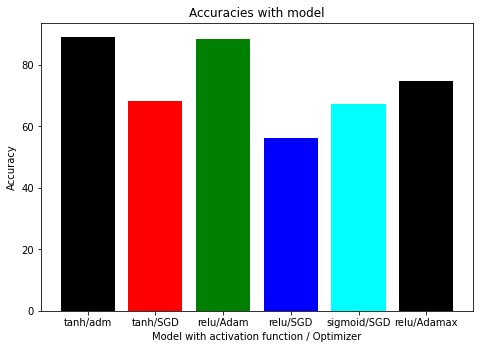

In [245]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = [23,17,35,29,12]
ax.bar(activation_opt_list,accuracy_list,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Accuracies with model")
plt.xlabel("Model with activation function / Optimizer")
plt.ylabel("Accuracy")
plt.show()